***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [17]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [18]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [19]:
classes = [0, 788*2, 788*5, 788*15, 788*25, dados.Renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [20]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [21]:
dados['Classe'] = pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest=True)
frequencia = dados['Classe'].value_counts()
print(dados.head())
frequencia


   UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura Classe
0  11     0     23    8              12    800  1.603808      E
1  11     1     23    2              12   1150  1.739790      E
2  11     1     35    8              15    880  1.760444      E
3  11     0     46    2               6   3500  1.783158      D
4  11     1     47    8               9    150  1.690631      E


E    49755
D    18602
C     7241
B      822
A      420
Name: Classe, dtype: int64

### 4º Construir a coluna de percentuais

In [23]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest=True), normalize = True)*100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [28]:
df_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual}).sort_values(by = 'Frequência', ascending = True)
df_freq_perc

,Frequência,Percentual (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:title={'center':'Frequência de classes'}>

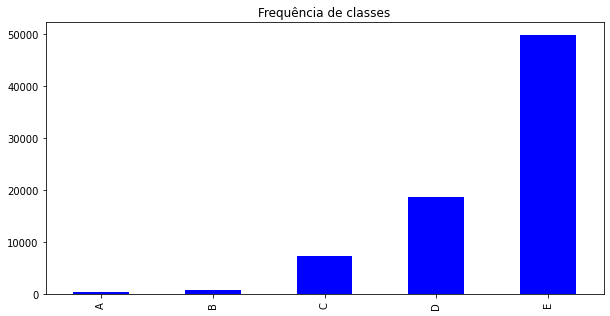

In [31]:
df_freq_perc['Frequência'].plot(kind = 'bar', title = 'Frequência de classes', figsize = (10, 5), color = 'blue')

> ### Conclusões

Podemos ver que aproximadamente 89% das pessoas analisadas estão nas classes E e D (entre 0 e 5 SM), onde a maioria se encontra na classe E, cerca de 65%, com até 2 SM.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros'>

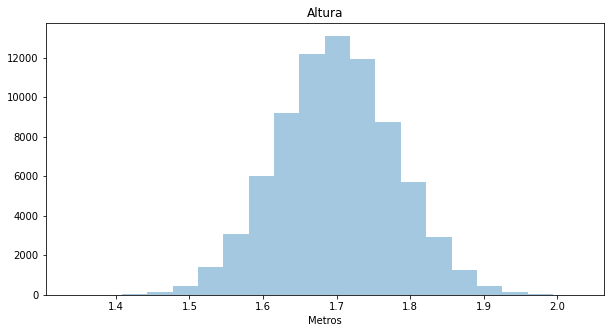

In [47]:
# A altura possui uma simetria pois tanto a moda, quanto a mediana e a media possuem valores quase iguais.
# O gráfico demonstra que a maior das pessoas analisadas possuem altura entre 1,60 e 1,80, tendo a maioria pro volta dos 1,70.
# Também conseguimos analisar que tanto os homens quanto as mulheres seguem um padrão de altura semelhante.
ax = sns.distplot(dados.Altura, bins = 20, kde=False)
ax.figure.set_size_inches(10,5)
ax.set_title('Altura')
ax.set_xlabel('Metros')
ax

<AxesSubplot:title={'center':'Altura Mulheres'}, ylabel='Frequency'>

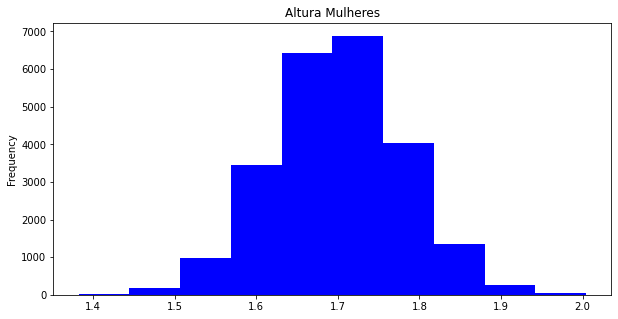

In [79]:
dados.query('Sexo == 1').Altura.plot(kind = 'hist', title = 'Altura Mulheres', figsize = (10, 5), color = 'blue')

<AxesSubplot:title={'center':'Altura Homens'}, ylabel='Frequency'>

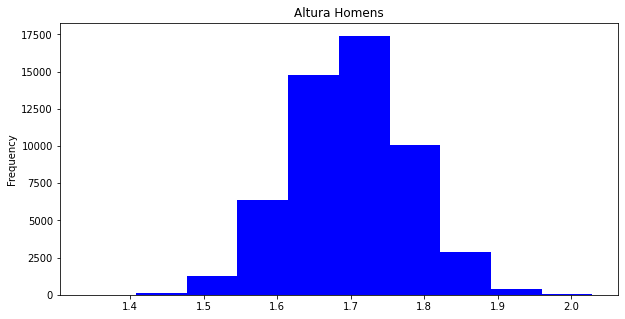

In [81]:
dados.query('Sexo == 0').Altura.plot(kind = 'hist', title = 'Altura Homens', figsize = (10, 5), color = 'blue')

In [59]:
dados.Altura.mode().median()

1.708162716

In [60]:
dados.Altura.median()

1.6993247325

In [61]:
dados.Altura.mean()

1.6995124540575741

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Idade'}, xlabel='Anos'>

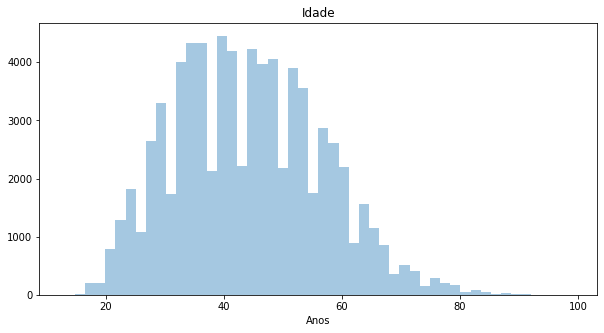

In [92]:
# A idade possui uma assimetria a direita pois a moda < mediana < media
# Conseguimos identificar que a maioria das pessoas analisadas possuem por volta dos 40 anos.
ax = sns.distplot(dados.Idade,kde=False)
ax.figure.set_size_inches(10,5)
ax.set_title('Idade')
ax.set_xlabel('Anos')
ax

In [64]:
dados.Idade.mode()[0]

40

In [65]:
dados.Idade.median()

43.0

In [66]:
dados.Idade.mean()

44.07142113482561

<AxesSubplot:title={'center':'Renda'}, xlabel='Reais'>

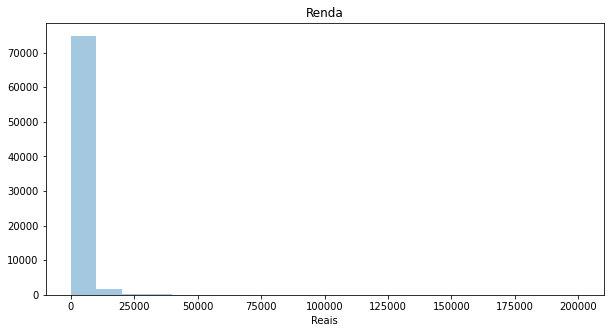

In [56]:
# A renda possui uma assimetria a direita pois a moda < mediana < media
# Conseguimos analisar que a maioria das pessoas analisadas possuem renda inferior a 2000 reais.
ax = sns.distplot(dados.Renda, bins = 20, kde=False)
ax.figure.set_size_inches(10,5)
ax.set_title('Renda')
ax.set_xlabel('Reais')
ax

In [68]:
dados.Renda.mode()[0]

788

In [69]:
dados.Renda.median()

1200.0

In [70]:
dados.Renda.mean()

2000.3831988547631

C:\Users\renat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Renda'}, xlabel='Reais'>

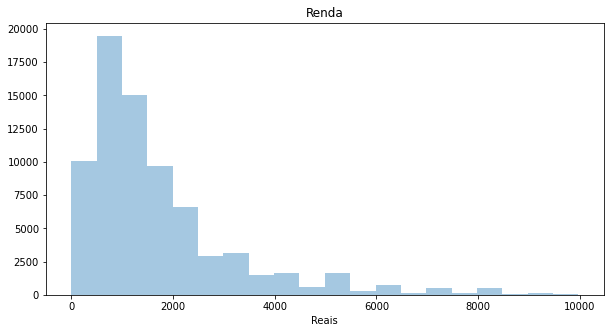

In [57]:
ax = sns.distplot(dados.query('Renda < 10000').Renda, bins = 20, kde=False)
ax.figure.set_size_inches(10,5)
ax.set_title('Renda')
ax.set_xlabel('Reais')
ax

> ### Conclusões


#### Altura
A altura possui uma simetria pois tanto a moda, quanto a mediana e a media possuem valores quase iguais.

O gráfico demonstra que a maior das pessoas analisadas possuem altura entre 1,60 e 1,80, tendo a maioria pro volta dos 1,70.

Também conseguimos analisar que tanto os homens quanto as mulheres seguem um padrão de altura semelhante.

#### Idade
A idade possui uma assimetria a direita pois a moda < mediana < media

Conseguimos identificar que a maioria das pessoas analisadas possuem por volta dos 40 anos.

#### Renda
A renda possui uma assimetria a direita pois a moda < mediana < media

Conseguimos analisar que a maioria das pessoas analisadas possuem renda inferior a 2000 reais.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:title={'center':'Renda'}, xlabel='Reais'>

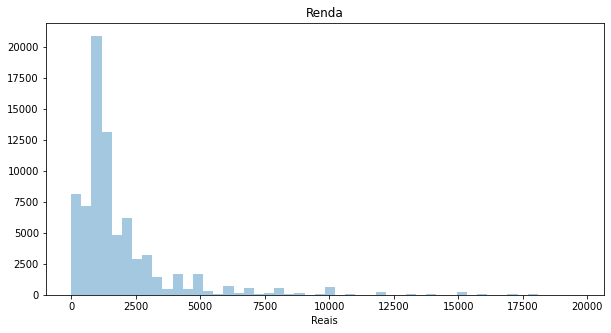

In [93]:
ax = sns.distplot(dados.query('Renda < 20000').Renda, kde=False)
ax.figure.set_size_inches(10,5)
ax.set_title('Renda')
ax.set_xlabel('Reais')
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [83]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [95]:
cor_sexo_freq = pd.crosstab(dados.Sexo, dados.Cor)
cor_sexo_freq.rename(index = sexo, inplace = True)
cor_sexo_freq.rename(columns = cor, inplace = True)
cor_sexo_freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [98]:
cor_sexo_perc = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)
cor_sexo_perc.rename(index = sexo, inplace = True)
cor_sexo_perc.rename(columns = cor, inplace = True)
cor_sexo_perc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


> ### Conclusões
O grupo majoritario de pessoas, tanto mulheres quanto homens, possuem cor parda e branca.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [85]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [86]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [87]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [90]:
dados.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [89]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [91]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [102]:
renda_cor_sexo = pd.crosstab(dados.Sexo, dados.Cor,values = dados.Renda, aggfunc={'mean','median','max'})
renda_cor_sexo.rename(index = sexo, columns= cor, inplace = True)
renda_cor_sexo

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR

In [108]:
disp_renda_cor_sexo = pd.crosstab(dados.Cor, dados.Sexo,values = dados.Renda, aggfunc={'mad','var','std'})
disp_renda_cor_sexo.rename(index = cor, columns= sexo, inplace = True)
disp_renda_cor_sexo

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

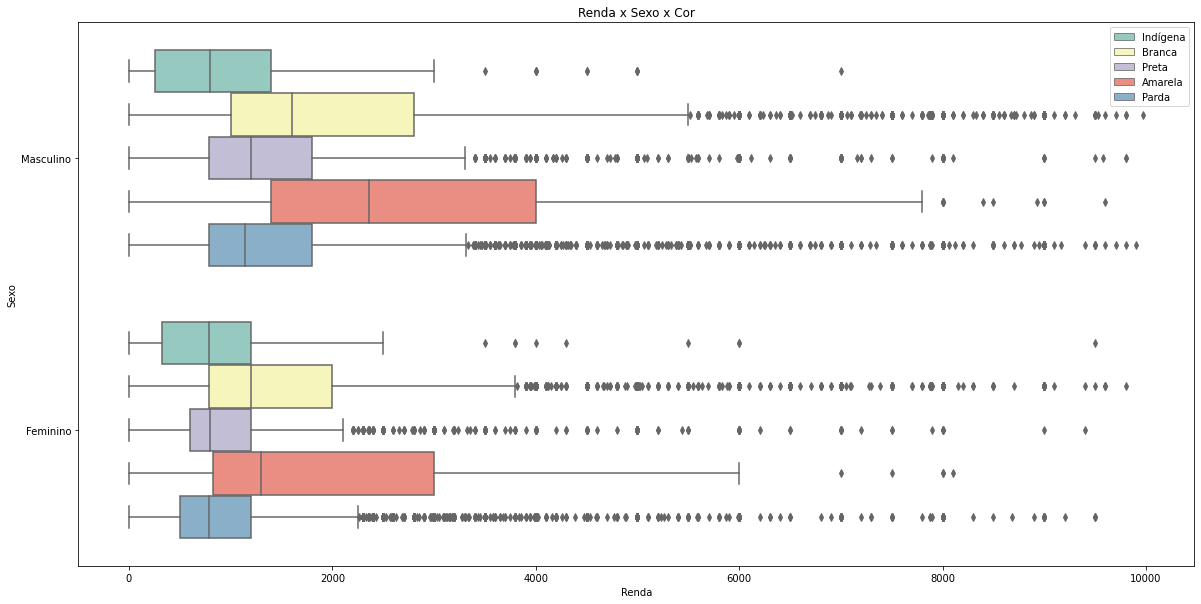

In [112]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', hue = 'Cor', data = dados.query('Renda < 10000'), palette = 'Set3', orient = 'h')
ax.figure.set_size_inches(20,10)
ax.set_title('Renda x Sexo x Cor')
ax.set_xlabel('Renda')
ax.set_ylabel('Sexo')
ax.set_yticklabels(['Masculino', 'Feminino'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Indígena','Branca','Preta','Amarela','Parda','Sem declaração'], loc = 'upper right')

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [130]:
sp.stats.percentileofscore(dados.Renda, 788, kind = 'weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [131]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [132]:
pd.crosstab(dados['Anos de Estudo'], dados['Sexo'], values=dados.Renda, aggfunc={'mean','median','max','std'})

max                 mean               median          \
Sexo                 0       1            0            1       0       1   
Anos de Estudo                                                             
1                30000   10000   799.494638   516.201748   700.0   390.0   
2                30000    2000   895.629047   492.771987   788.0   400.0   
3                40000    4000   931.178986   529.911638   788.0   450.0   
4                80000    3500  1109.203862   546.853916   800.0   500.0   
5                50000   10000  1302.329283   704.279111  1000.0   788.0   
6                35000    8000  1338.653218   781.389776  1045.0   788.0   
7                25000    6000  1448.875419   833.732824  1200.0   788.0   
8                40000    9000  1465.497940   830.751004  1200.0   788.0   
9                30000   18000  1639.396667   933.615351  1300.0   800.0   
10               60000   20000  1508.038850   868.021700  1200.0   788.0   
11               45000    6000  1731.270847   925.919225  1218.0   800.0   
12              200000  100000  2117.060504  1286.790889  1500.0  1000.0   
13               30000  120000  2470.330776  1682.313725  1800.0  1200.0   
14               25000   20000  3195.099154  1911.730047  2400.0  1300.0   
15               50000   20000  3706.620269  2226.460457  2500.0  1600.0   
16              200000  100000  6134.279790  3899.513231  4000.0  2800.0   
17                7000    3000  1295.761905   798.174419  1200.0   788.0   

                        std               
Sexo                      0            1  
Anos de Estudo                            
1               1023.904884   639.311534  
2               1331.950552   425.291842  
3               1435.173827   498.234168  
4               2143.800133   424.124446  
5               1419.821787   629.553397  
6               1484.650587   635.782641  
7               1476.628602   574.547028  
8               1419.708673   602.038029  
9               1515.583715   896.781213  
10              2137.664774   973.221652  
11              2078.609734   620.611907  
12              2676.538942  1819.040417  
13              2268.081538  4851.833513  
14              2797.116800  2053.789771  
15              3987.214974  2064.083336  
16              7447.613594  4212.770709  
17               979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

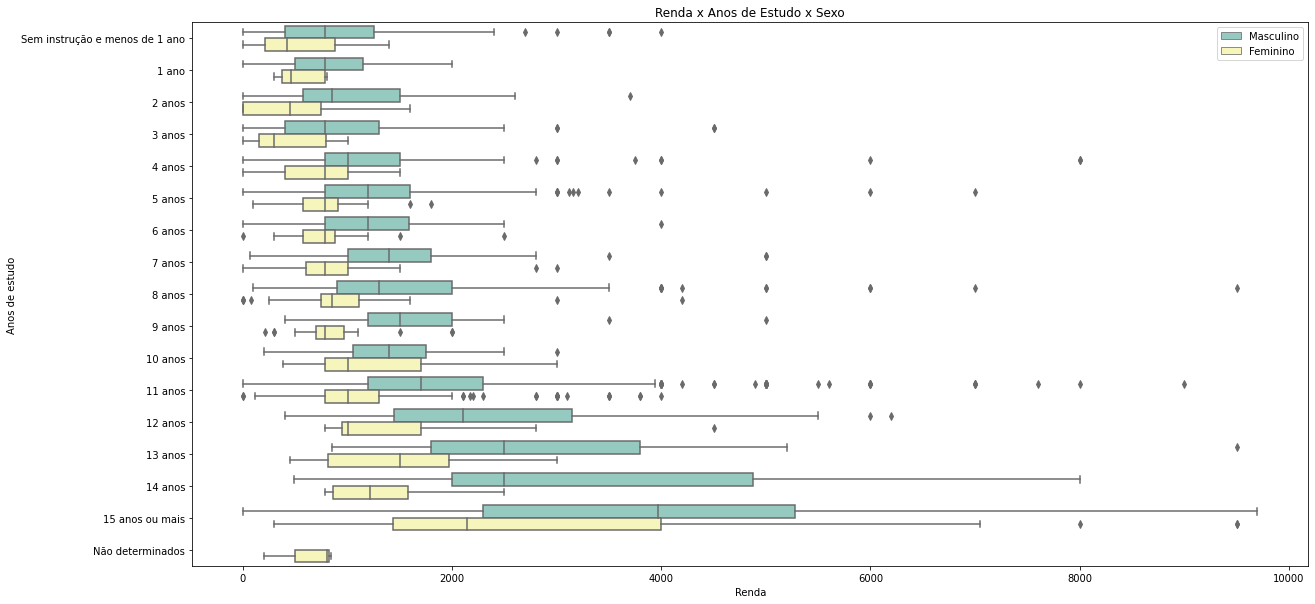

In [140]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 40'), palette = 'Set3', orient = 'h')
ax.figure.set_size_inches(20,10)
ax.set_title('Renda x Anos de Estudo x Sexo')
ax.set_xlabel('Renda')
ax.set_ylabel('Anos de estudo')
ax.set_yticklabels(key for key in anos_de_estudo.values())
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], loc = 'upper right')

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [154]:
dados.groupby(['UF']).agg({'Renda':['mean','median','max','std']}).rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Renda x UF'}, xlabel='Renda', ylabel='UF'>

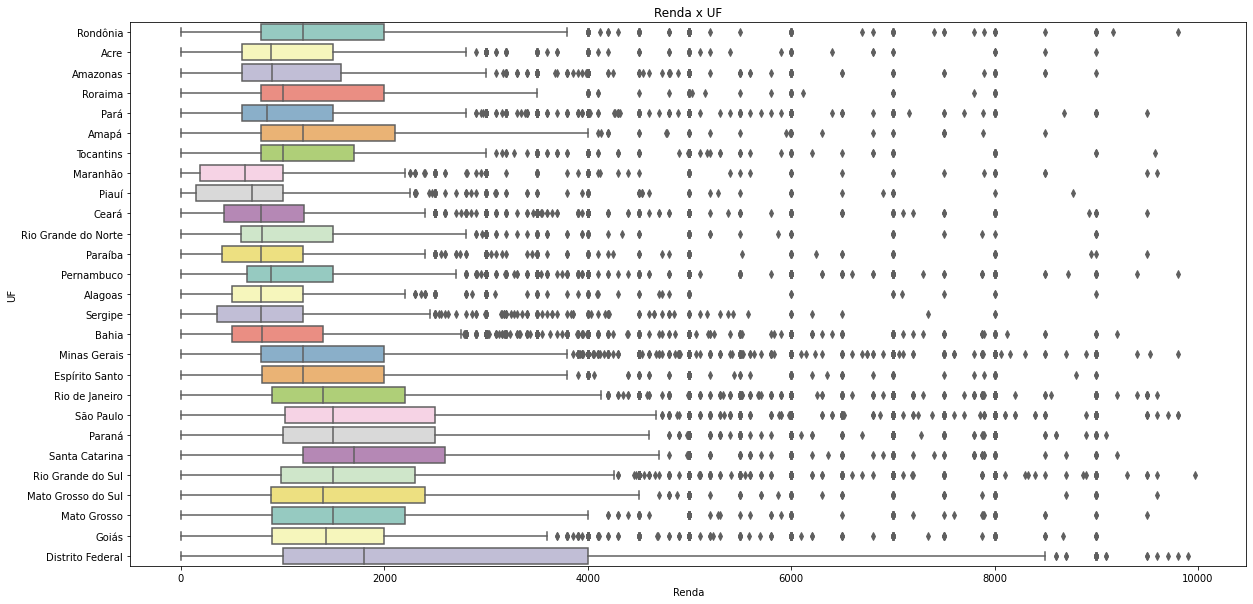

In [153]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), palette = 'Set3', orient = 'h')
ax.figure.set_size_inches(20,10)
ax.set_title('Renda x UF')
ax.set_xlabel('Renda')
ax.set_ylabel('UF')
ax.set_yticklabels(key for key in uf.values())
ax